# Experiment 3 Linear regression - a simple NeuralNetwork

## 1. Task 

This first part will cover:
<ul>
<li>A very simple neural network
<li>Concepts such as target function and cost function
<li>Gradient descent optimisation
</ul>
All this will be illustrated with the help of the simplest neural network possible: a 1 input 1 output linear regression model
that has the goal to predict the target value from the input value . The network is defined as having an input which
gets transformed by the weight to generate the output by the formula , and where needs to approximate
the targets as good as possible as defined by a cost function. This network can be represented graphically as:

![graph.png](graph.PNG)

In regular neural networks, we typically have multiple layers, non-linear activation functions, and a bias for each node. In
this tutorial, we only have one layer with one weight parameter , no activation function on the output, and no bias. In
simple linear regression the parameter and bias are typically combined into the parameter vector where bias is the
y-intercept and is the slope of the regression line. In linear regression, these parameters are typically fitted via the least squares method.<br>
In this tutorial, we will approximate the targets with the outputs of the model by minimizing the squared error cost
function (= squared Euclidian distance). The squared error cost function is defined as . The minimization of the
cost will be done with the gradient descent optimization algorithm which is typically used in training of neural networks.

## 1 importing the libraries

In [1]:
 # Python imports
import numpy as np
import matplotlib.pyplot as plt # Plotting library
# Allow matplotlib to plot inside this notebook
%matplotlib inline
# Set the seed of the numpy random number generator so that the tutorial is reproducable
np.random.seed(seed=1)

## 2 Define the target function

In this example, the targets $t$ will be generated from a function $f$ and additive gaussian noise (http://en.wikipedia.org/wiki/Normal_distribution (http://en.wikipedia.org/wiki/Normal_distribution)) sampled from $N(0,0.2)$, where $N$ is the normal distribution with mean $0$ and variance $0.2$. $f$ is defined as $f(x) = x * 2$, with $x$ the input samples, slope and intercept $0$. $t$ is $f(x) + N(0,0.2)$<br>
We will sample $20$ input samples $x$ from the uniform distribution between $0$ and $1$, and then generate the target output values $t$ by the process described above. These resulting inputs $x$ and targets $t$ are plotted against each other in the figure below together with the original $f(x)$ line without the gaussian noise. Note that $x$ is a vector of individual input samples $x_i$, and that $t$ is a corresponding vector of target values $t_i$.

In [2]:
# Define the vector of input samples as x, with 20 values sampled from a uniform distribution
# between 0 and 1
x = np.random.uniform(0, 1, 20)
# Generate the target values t from x with small gaussian noise so the estimation won't
# be perfect.
# Define a function f that represents the line that generates t without noise
def f(x):
    return x * 2

# Create the targets t with some gaussian noise
noise_variance = 0.2 # Variance of the gaussian noise

# Gaussian noise error for each sample in x
noise = np.random.randn(x.shape[0]) * noise_variance
# Create targets t
t = f(x) + noise

## 3 Plot target function

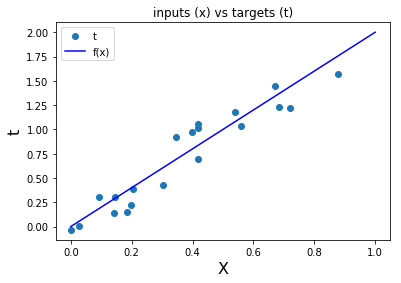

In [3]:
# Plot the target t versus the input x
plt.plot(x, t, 'o', label='t')
# Plot the initial line
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.title('inputs (x) vs targets (t)')
plt.xlabel('X', fontsize=16)
plt.ylabel('t', fontsize=16)
plt.legend(loc='best')

## 4 Define the cost function

We will optimize the model $y = x * w$ by tuning parameter $w$ so that the squared error cost along all samples is
minimized. The squared error cost is defined as $\xi = \sum_{i=1}^{N}\|t_i - y_i\|^2$, with $N$ the number of samples in the training set. The optimization goal is thus: $argmin\sum_{i=1}^{N}\|t_i - y_i\|^2$.<br>
Notice that we take the sum of errors over all samples, which is known as batch training. We could also update the
parameters based upon one sample at a time, which is known as online training.<br>
This cost function for variable $w$ is plotted in the figure below. The value $w = 2$ is at the minimum of the cost function (bottom of the parabola), this value is the same value as the slope we choose for $f(x)$. Notice that this function is convexand that there is only one minimum: the global minimum. While every squared error cost function for linear regression isconvex, this is not the case for other models and other cost functions.<br>
The neural network model is implemented in the nn(x, w) function, and the cost function is implemented in the
cost(y, t) function.

In [4]:
# Define the neural network function y = x * w
def nn(x, w):
    return x * w
    
# Define the cost function
def cost(y, t):
    return np.sum((t-y)**2)
    

## 5 Plot the cost function

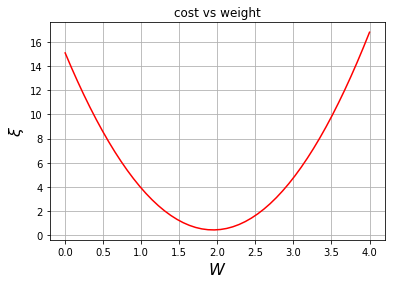

In [5]:
# Plot the cost vs the given weight w
ws = np.linspace(0,4)
cost_ws = np.vectorize(lambda w: cost(nn(x,w), t))(ws)
plt.plot(ws, cost_ws, 'r-')
plt.title('cost vs weight')
plt.xlabel('$W$', fontsize=16)
plt.ylabel('$\\xi$', fontsize=16)
plt.grid()

## 6 Optimizing the cost function

For a simple cost function like in this example, you can see by eye what the optimal weight should be. But the error
surface can be quite complex or have a high dimensionality (each parameter adds a new dimension). This is why we use
optimization techniques to find the minimum of the error function.

## 6.1 Gradient descent

One optimization algorithm commonly used to train neural networks is the gradient descent algorithm. The gradient
descent algorithm works by taking the derivative of the cost function with respect to the parameters at a specific position on this cost function, and updates the parameters in the direction of the negative gradient. The parameter is iteratively updated by taking steps proportional to the negative of the gradient: $$w(k+1)=w(k)- \Delta w(k)$$<br> With $w(k)$ the value of $w$ at iteration $k$ during the gradient descent.<br>
$\Delta w(t)$ is defined as:<br>

$$\Delta w = \mu\frac{\partial\xi}{\partial w}$$ <br>

With $\mu$ the learning rate, which is how big of a step you take along the gradient, and $\partial\xi/\partial w$ the gradient of the cost function $\xi$ with respect to the weight $w$. For each sample $i$ this gradient can be splitted according to the chain rule into:<br>

$$\frac{\partial\xi_i}{\partial w} = \frac{\partial y_i}{\partial w}\frac{\partial\xi_i}{\partial y_i}$$<br>

Where $\xi_i$ is the squared error cost, so the $\partial\xi_i/\partial y_i$ term can be written as:<br>

$$\frac{\partial\xi_i}{\partial y_i} = \frac{\partial (t_i - y_i)^2}{\partial y_i} = -2(t_i - y_i) = 2(y_i - t_i)$$<br>

And since $y_i = x_i * w$ we can write $\partial y_i / \partial w$ as: <br>

$$\frac{\partial y_i}{\partial w} = \frac{\partial (x_i * w)}{\partial w} = x_i$$<br>

So the full update function $\Delta w$ for sample $i$ will become:<br>

$$\Delta w = \mu * 2 * \sum _{i=1}^{N}x_i(y_i - t_i)$$<br>

To start out the gradient descent algorism you typicaly start with picking the initial parameters at random and start updating these parameter with $\Delta w$ until convergence. the learning need to be tuned separately as a hyperparameter for each neural network.<br>
The gradient $\partial\xi / \partial w$ is implemented by the <i>gradient(w, x, t)</i> function.$\Delta w$ is computed by the <i>delta_w(w_t, x, t, learning_rate)</i>. The loop below porforms 4 iterations of gradient descent while printing out the parameter value and current cost.

In [6]:
# define the gradient function. Remember that y = nn(x, w) = x * w
def gradient(w, x, t):
    return 2 * x * (nn(x, w) - t)

# define the update function delta w
def delta_w(w_k, x, t, learning_rate):
    return learning_rate * gradient(w_k, x, t).sum()

# Set the initial weight parameter
w = 0.1
# Set the learning rate
learning_rate = 0.1
# Start performing the gradient descent updates, and print the weights and cost:
nb_of_iterations = 4 # number of gradient descent updates
w_cost = [(w, cost(nn(x, w), t))] # List to store the weight,costs values
for i in range(nb_of_iterations):
    new_w = w_cost[i][0] - delta_w(w_cost[i][0], x, t, learning_rate)
    w_cost.append((new_w, cost(nn(x, new_w), t)))
    
# Print the final w, and cost
for i in range(0, len(w_cost)):
    print('w({}): {:.4f} \t cost: {:.4f}'.format(i, w_cost[i][0], w_cost[i][1]))

w(0): 0.1000 	 cost: 13.6197
w(1): 1.5277 	 cost: 1.1239
w(2): 1.8505 	 cost: 0.4853
w(3): 1.9234 	 cost: 0.4527
w(4): 1.9399 	 cost: 0.4510


Notice in the previous outcome that the gradient descent algorithm quickly converges towards the target value around $2.0$. Let's try to plot these iterations of the gradient descent algorithm to visualize it more.

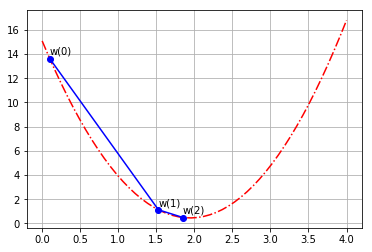

In [7]:
# Plot the first 2 gradient descent updates
plt.plot(ws, cost_ws, 'r-.') # Plot the error curve
# Plot the updates
u_w = {}
i = 0;
for w, c in w_cost[:3]:
    label = "w({})".format(i)
    plt.annotate(label, xy=(w, c),xytext=(w, c+1),
               horizontalalignment='left', verticalalignment='top')
    i += 1
    u_w[w]=c
    
plt.plot(u_w.keys(), u_w.values(), 'b.-', markersize=12)
plt.grid()

## 6.2 Gradient descent updates

The last figure shows the gradient descent updates of the weight parameters for 2 iterations. The blue dots represent the weight parameter values $w(k)$ at iteration $k$. Notice how the update differs from the position of the weight and the gradient at that point. The first update takes a much larger step than the second update because the gradient at $w(0)$ is much larger than the gradient at $w(1)$.<br>
The regression line fitted by gradient descent with $10$ iterations is shown in the figure below. The fitted line (red) lies close to the original line (blue), which is what we tried to approximate via the noisy samples. Notice that both lines go through point (0,0), this is because we didn't have a bias term, which represents the intercept, the intercept at $x = 0$ is thus $t = 0$.

In [8]:
w = 0
# Start performing the gradient descent updates
nb_of_iterations = 10 # number of gradient descent updates
for i in range(nb_of_iterations):
    new_w = w_cost[i][0] - delta_w(w_cost[i][0], x, t, learning_rate) # get the delta w update
    w_cost.append((new_w, cost(nn(x, new_w), t)))# update the current weight parameter
# Print the final w, and cost
for i in range(0, len(w_cost)):
    print('w({}): {:.4f} \t cost: {:.4f}'.format(i, w_cost[i][0], w_cost[i][1]))

w(0): 0.1000 	 cost: 13.6197
w(1): 1.5277 	 cost: 1.1239
w(2): 1.8505 	 cost: 0.4853
w(3): 1.9234 	 cost: 0.4527
w(4): 1.9399 	 cost: 0.4510
w(5): 1.5277 	 cost: 1.1239
w(6): 1.8505 	 cost: 0.4853
w(7): 1.9234 	 cost: 0.4527
w(8): 1.9399 	 cost: 0.4510
w(9): 1.9436 	 cost: 0.4510
w(10): 1.8505 	 cost: 0.4853
w(11): 1.9234 	 cost: 0.4527
w(12): 1.9399 	 cost: 0.4510
w(13): 1.9436 	 cost: 0.4510
w(14): 1.9445 	 cost: 0.4510


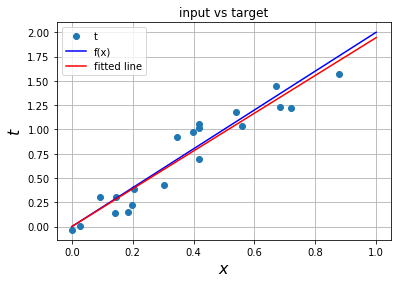

In [9]:
# Plot the fitted line agains the target line
# Plot the target t versus the input x
plt.plot(x, t, 'o', label='t')
# Plot the initial line
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
# plot the fitted line
w = w_cost[14][0]
plt.plot([0, 1], [nn(0,w), nn(1,w)], 'r-', label='fitted line')
plt.title('input vs target')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$t$', fontsize=16)
plt.legend(loc='best')
plt.grid()

## 7. Analysis and Conclusion